# Exploratory Data Analysis

To replicate the analysis of this notebook you have to download the dataset from this link: https://data.open-power-system-data.org/time_series/opsd-time_series-2018-06-30.zip and save it in data/raw_ignored folder. This folder will be ignored by git because it contains big files.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Wind and solar generation time-series in Spain

In [26]:
path = "../data/raw_ignored/opsd-time_series-2018-06-30.zip"

!unzip -l {path}

Archive:  ../data/raw_ignored/opsd-time_series-2018-06-30.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   203082  2018-10-10 09:34   opsd-time_series-2018-06-30/datapackage.json
153712522  2018-06-28 17:16   opsd-time_series-2018-06-30/time_series.xlsx
131819275  2018-06-28 00:49   opsd-time_series-2018-06-30/time_series_15min_singleindex.csv
  7005843  2018-06-28 10:32   opsd-time_series-2018-06-30/time_series_30min_singleindex.csv
116393652  2018-07-01 03:17   opsd-time_series-2018-06-30/time_series_60min_singleindex.csv
    46017  2018-12-20 16:39   opsd-time_series-2018-06-30/README.md
---------                     -------
409180391                     6 files


In [27]:
!unzip -p {path} opsd-time_series-2018-06-30/README.md | cat













This data package contains different kinds of timeseries data relevant for
power system modelling, namely electricity consumption (load) for 37
European countries as well as wind and solar power generation and
capacities and prices for a growing subset of countries. The timeseries
become available at different points in time depending on the sources. The
data has been downloaded from the sources, resampled and merged in a large
CSV file with hourly resolution. Additionally, the data available at a
higher resolution (Some renewables in-feed, 15 minutes) is provided in a
separate file. All data processing is conducted in python and pandas and

























    Attribution in Chicago author-date style should be given as follows:
    "Open Power System Data. 2018. Data Package Time series. Version
    2018-06-30. https://doi.org/10.25832/time_series/2018-06-30. (Primary



























* Amprion
* 50Hertz
* ENTSO-E Transparency
* TenneT
* TransnetBW
* ENTS

In [28]:
from zipfile import ZipFile

zf = ZipFile(path)
zf

<zipfile.ZipFile filename='../data/raw_ignored/opsd-time_series-2018-06-30.zip' mode='r'>

In [32]:
filepath = "opsd-time_series-2018-06-30/time_series_60min_singleindex.csv"
csvfile = zf.open(filepath)
df = pd.read_csv(csvfile, parse_dates=[0,1])
df.head()

/home/bsanse/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (216) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,utc_timestamp,cet_cest_timestamp,AL_load_entsoe_power_statistics,AT_load_entsoe_power_statistics,AT_load_entsoe_transparency,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BA_load_entsoe_power_statistics,BA_load_entsoe_transparency,BE_load_entsoe_power_statistics,...,SI_price_day_ahead,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_entsoe_power_statistics,SK_load_entsoe_transparency,SK_price_day_ahead,SK_solar_generation_actual,TR_load_entsoe_power_statistics,UA_west_load_entsoe_power_statistics,interpolated_values
0,2005-12-31 23:00:00,2005-12-31 23:00:00,NaN,6297.0,NaN,NaN,NaN,1425.0,NaN,9829.0,...,NaN,NaN,NaN,3332.0,NaN,NaN,NaN,NaN,719.0,NaN
1,2006-01-01 00:00:00,2006-01-01 00:00:00,NaN,6005.0,NaN,NaN,NaN,1358.0,NaN,9447.0,...,NaN,NaN,NaN,3165.0,NaN,NaN,NaN,NaN,695.0,NaN
2,2006-01-01 01:00:00,2006-01-01 01:00:00,NaN,5743.0,NaN,NaN,NaN,1283.0,NaN,9062.0,...,NaN,NaN,NaN,3040.0,NaN,NaN,NaN,NaN,654.0,NaN
3,2006-01-01 02:00:00,2006-01-01 02:00:00,NaN,5397.0,NaN,NaN,NaN,1175.0,NaN,8589.0,...,NaN,NaN,NaN,3021.0,NaN,NaN,NaN,NaN,644.0,NaN
4,2006-01-01 03:00:00,2006-01-01 03:00:00,NaN,5213.0,NaN,NaN,NaN,1134.0,NaN,8247.0,...,NaN,NaN,NaN,2959.0,NaN,NaN,NaN,NaN,638.0,NaN


In [55]:
df = df[df.columns[df.columns.str.contains("time") | df.columns.str.contains("ES")]]
df.dropna().tail()

,utc_timestamp,cet_cest_timestamp,ES_load_entsoe_power_statistics,ES_load_entsoe_transparency,ES_price_day_ahead,ES_solar_generation_actual,ES_wind_onshore_generation_actual
108066,2018-04-30 17:00:00,2018-04-30 17:00:00,26537.0,26537.0,45.00,1623.0,4144.0
108067,2018-04-30 18:00:00,2018-04-30 18:00:00,27294.0,27294.0,47.23,863.0,4212.0
108068,2018-04-30 19:00:00,2018-04-30 19:00:00,29377.0,29377.0,50.00,296.0,4416.0
108069,2018-04-30 20:00:00,2018-04-30 20:00:00,27982.0,27982.0,48.54,114.0,4262.0
108070,2018-04-30 21:00:00,2018-04-30 21:00:00,25704.0,25704.0,47.01,44.0,4143.0


In [56]:
dfm = df.dropna().resample('D', on='utc_timestamp').sum()
dfm.head()

,ES_load_entsoe_power_statistics,ES_load_entsoe_transparency,ES_price_day_ahead,ES_solar_generation_actual,ES_wind_onshore_generation_actual
utc_timestamp,,,,,
2014-12-19,487051.0,974100.0,945.78,16364.0,57637.0
2014-12-20,656277.0,1312554.0,1213.23,15800.0,89467.0
2014-12-21,610628.0,1221256.0,1140.11,20588.0,79744.0
2014-12-22,706535.0,1413070.0,1305.34,19981.0,90018.0
2014-12-23,706503.0,1412960.0,1345.15,18039.0,64207.0


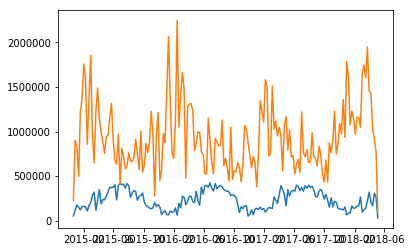

In [53]:
plt.plot(dfm['ES_solar_generation_actual'])
plt.plot(dfm['ES_wind_onshore_generation_actual'])